In [134]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [135]:
housing=pd.read_csv("train.csv");

In [136]:
#details of Uber_rd data frame
print(housing.info())
print('\n')
print(housing.describe())
print('\n')
print(housing.shape)
print('\n')
print(housing.columns)
#column-wise null percentages here
print(round(100*(housing.isnull().sum()/len(housing.index)),2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

max      12.000000  2010.000000  755000.000000  


(1460, 81)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCar

In [137]:
housing['Age_house']=housing.YrSold-housing.YearBuilt

housing['Age_house_remod']=0

housing.loc[housing.YearRemodAdd>housing.YrSold,'Age_house_remod'] =housing.loc[housing.YearRemodAdd>housing.YrSold,'YrSold']-housing.loc[housing.YearRemodAdd>housing.YrSold,'YearRemodAdd']

housing['Remod_ind']=housing['Age_house_remod'].map(lambda x: 'Y' if x == 0 else 'N')

In [113]:
#dropping columns with high null percentage 
housing.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','MasVnrArea','MoSold','YrSold','YearBuilt','YearRemodAdd'],axis=1,inplace=True)
# make sure that number of duplicate rows are zero
housing.drop_duplicates( inplace=True)

In [114]:
#check for unique values for categorical variables
print(housing['BsmtQual'].unique())
print('\n')

print(housing['BsmtCond'].unique())
print('\n')

print(housing['BsmtExposure'].unique())
print('\n')

print(housing['BsmtFinType1'].unique())
print('\n')

print(housing['BsmtFinType2'].unique())
print('\n')

print(housing['GarageType'].unique())
print('\n')

print(housing['GarageYrBlt'].unique())
print('\n')

print(housing['GarageFinish'].unique())
print('\n')

print(housing['GarageQual'].unique())
print('\n')

print(housing['GarageCond'].unique())
print('\n')

print(housing['Electrical'].unique())
print('\n')

print(housing['LotFrontage'].describe())
print('\n')

print(housing['MasVnrType'].unique())
print('\n')

['Gd' 'TA' 'Ex' nan 'Fa']


['TA' 'Gd' nan 'Fa' 'Po']


['No' 'Gd' 'Mn' 'Av' nan]


['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]


['RFn' 'Unf' 'Fin' nan]


['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


count    1201.000000
mean

In [115]:
#imputing values 
housing.loc[housing.BsmtQual.isnull(),'BsmtQual']='NA'
housing.loc[housing.BsmtCond.isnull(),'BsmtCond']='NA'
housing.loc[housing.BsmtExposure.isnull(),'BsmtExposure']='NA'
housing.loc[housing.BsmtFinType1.isnull(),'BsmtFinType1']='NA'
housing.loc[housing.BsmtFinType2.isnull(),'BsmtFinType2']='NA'
housing.loc[housing.GarageType .isnull(),'GarageType']='NA'
#year taken default 
housing.loc[housing.GarageYrBlt.isnull(),'GarageYrBlt']='9999'
housing.loc[housing.GarageFinish.isnull(),'GarageFinish']='NA'
housing.loc[housing.GarageQual.isnull(),'GarageQual']='NA'
housing.loc[housing.GarageCond .isnull(),'GarageCond']='NA'
# Chosen such value as max houses have the same so assuming  the rest also will have same type of electrical system 
housing.loc[housing.Electrical .isnull(),'Electrical']='SBrkr'
#chose the mean value 
housing.loc[(housing.LotFrontage.isnull()) ,'LotFrontage']=70
housing.loc[housing.MasVnrType.isnull(),'MasVnrType']='None'

In [116]:

print(round(100*(housing.isnull().sum()/len(housing.index)),2))

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage        0.0
LotArea            0.0
Street             0.0
LotShape           0.0
LandContour        0.0
Utilities          0.0
LotConfig          0.0
LandSlope          0.0
Neighborhood       0.0
Condition1         0.0
Condition2         0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
RoofStyle          0.0
RoofMatl           0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         0.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
BsmtQual           0.0
BsmtCond           0.0
BsmtExposure       0.0
BsmtFinType1       0.0
BsmtFinSF1         0.0
BsmtFinType2       0.0
BsmtFinSF2         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
Heating            0.0
HeatingQC          0.0
CentralAir         0.0
Electrical         0.0
1stFlrSF           0.0
2ndFlrSF           0.0
LowQualFinSF       0.0
GrLivArea          0.0
BsmtFullBat

## Data Expolration starts

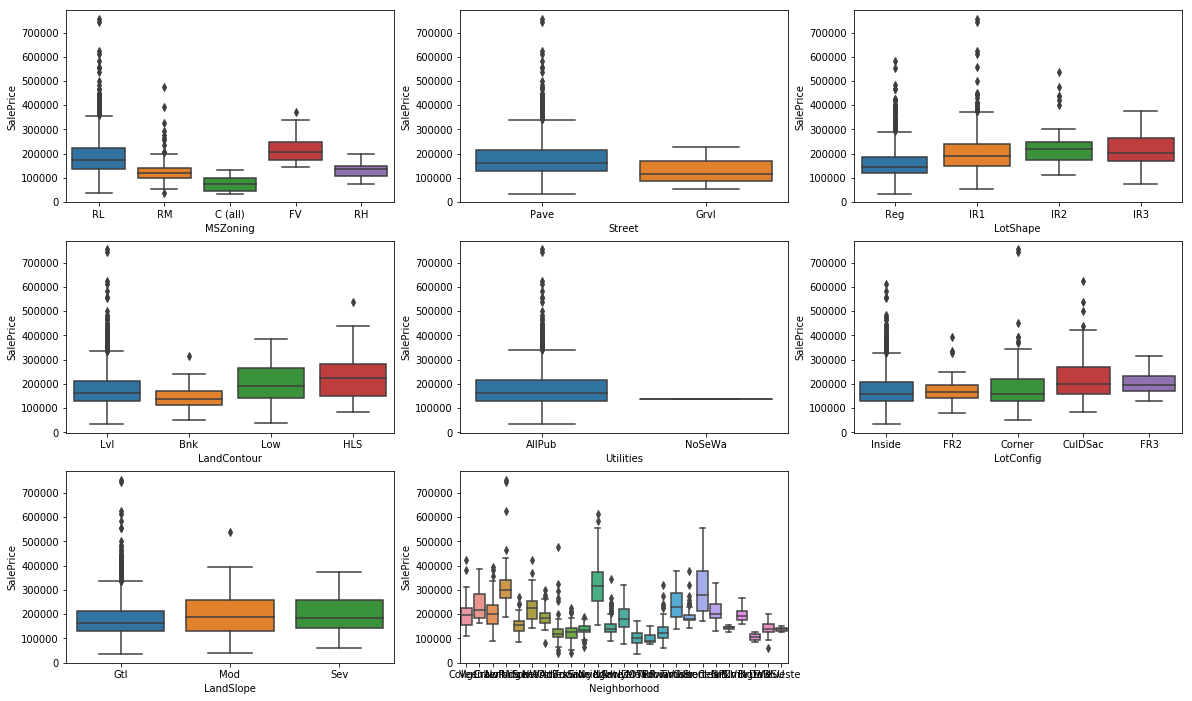

In [117]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing)
plt.subplot(3,3,2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = housing)
plt.subplot(3,3,3)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = housing)
plt.subplot(3,3,4)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = housing)
plt.subplot(3,3,5)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = housing)
plt.subplot(3,3,6)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = housing)
plt.subplot(3,3,7)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = housing)
plt.subplot(3,3,8)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing)
plt.show()

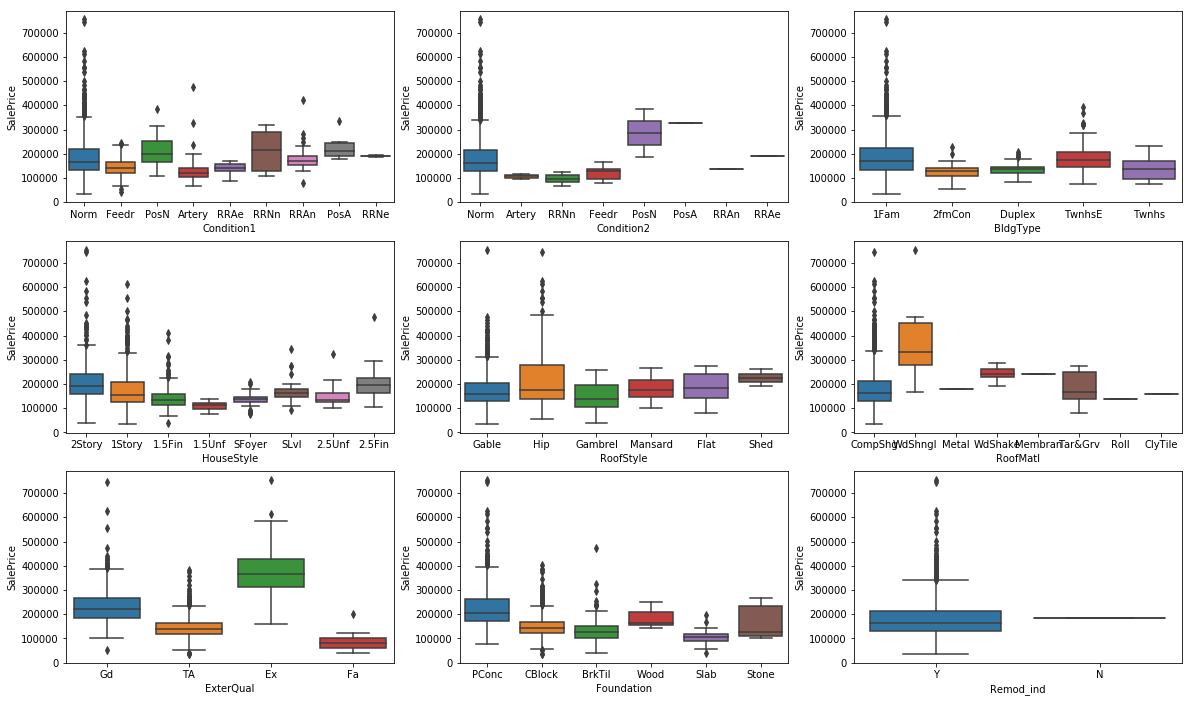

In [118]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = housing)
plt.subplot(3,3,2)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = housing)
plt.subplot(3,3,3)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing)
plt.subplot(3,3,4)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing)
plt.subplot(3,3,5)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing)
plt.subplot(3,3,6)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = housing)
plt.subplot(3,3,7)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = housing)
plt.subplot(3,3,8)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing)
plt.subplot(3,3,9)
sns.boxplot(x = 'Remod_ind', y = 'SalePrice', data = housing)
plt.show()

In [119]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age_house,Age_house_remod
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.041096,10516.828082,6.099315,5.575342,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945,-0.000685
std,421.610009,42.300571,22.024031,9981.264932,1.382997,1.112799,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152,0.026171
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000,0.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000,0.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,84.000000,0.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,91.000000,0.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,110.410000,0.000000


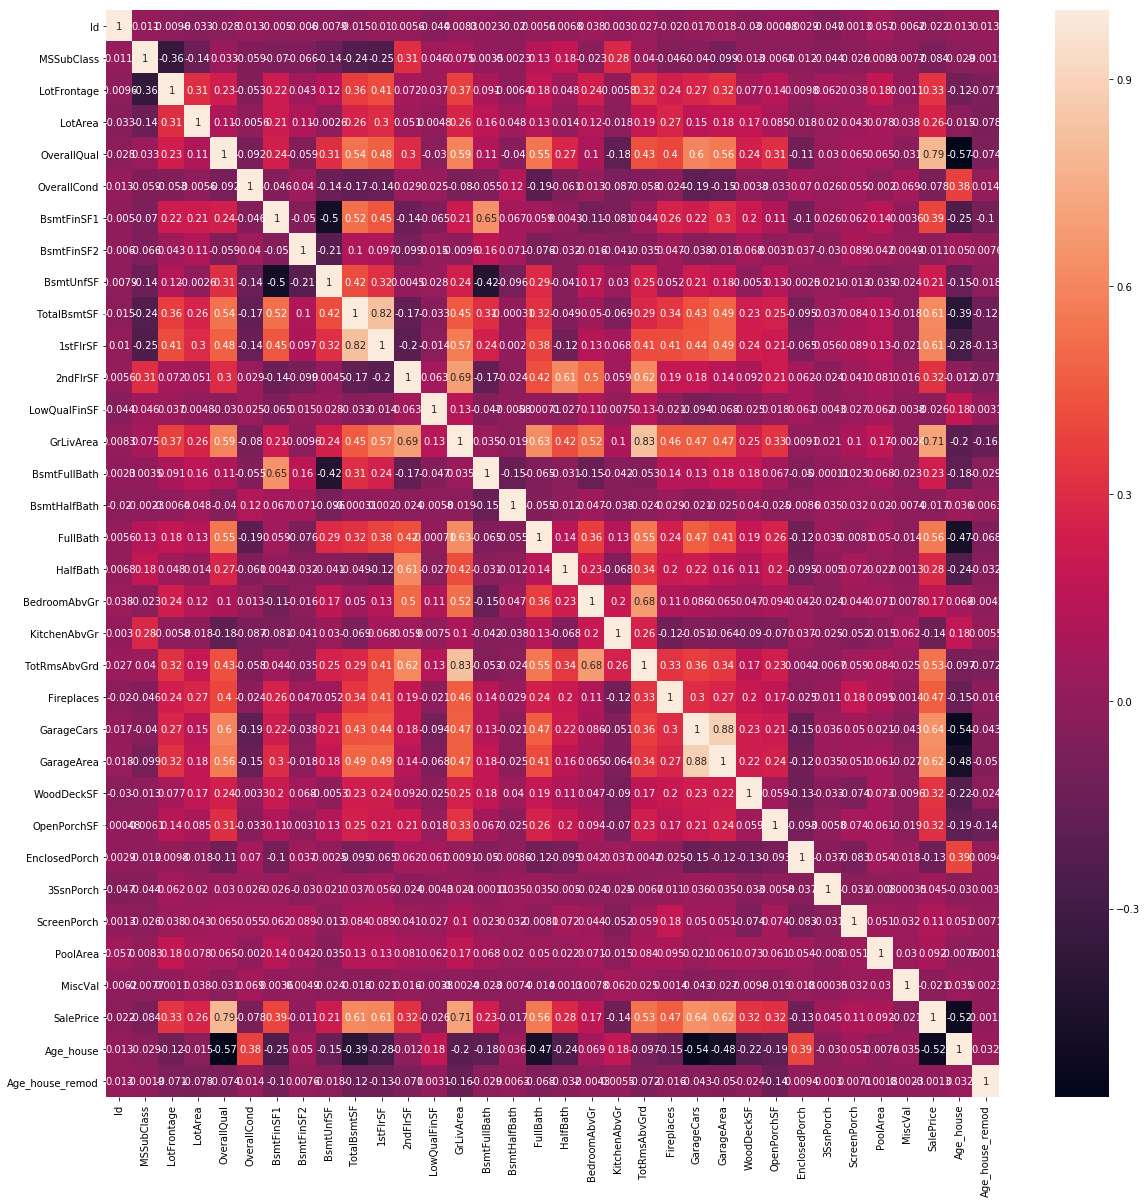

In [120]:
#Heat Map for Correlation 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(housing.corr(),annot = True)

In [121]:
housing.drop(['GrLivArea','1stFlrSF','TotalBsmtSF'],axis=1,inplace=True)
housing.drop(['OverallQual','GarageCars','GarageArea'],axis=1,inplace=True)
housing.drop(['BsmtFinSF1','2ndFlrSF','TotRmsAbvGrd','FullBath','Id'],axis=1,inplace=True)

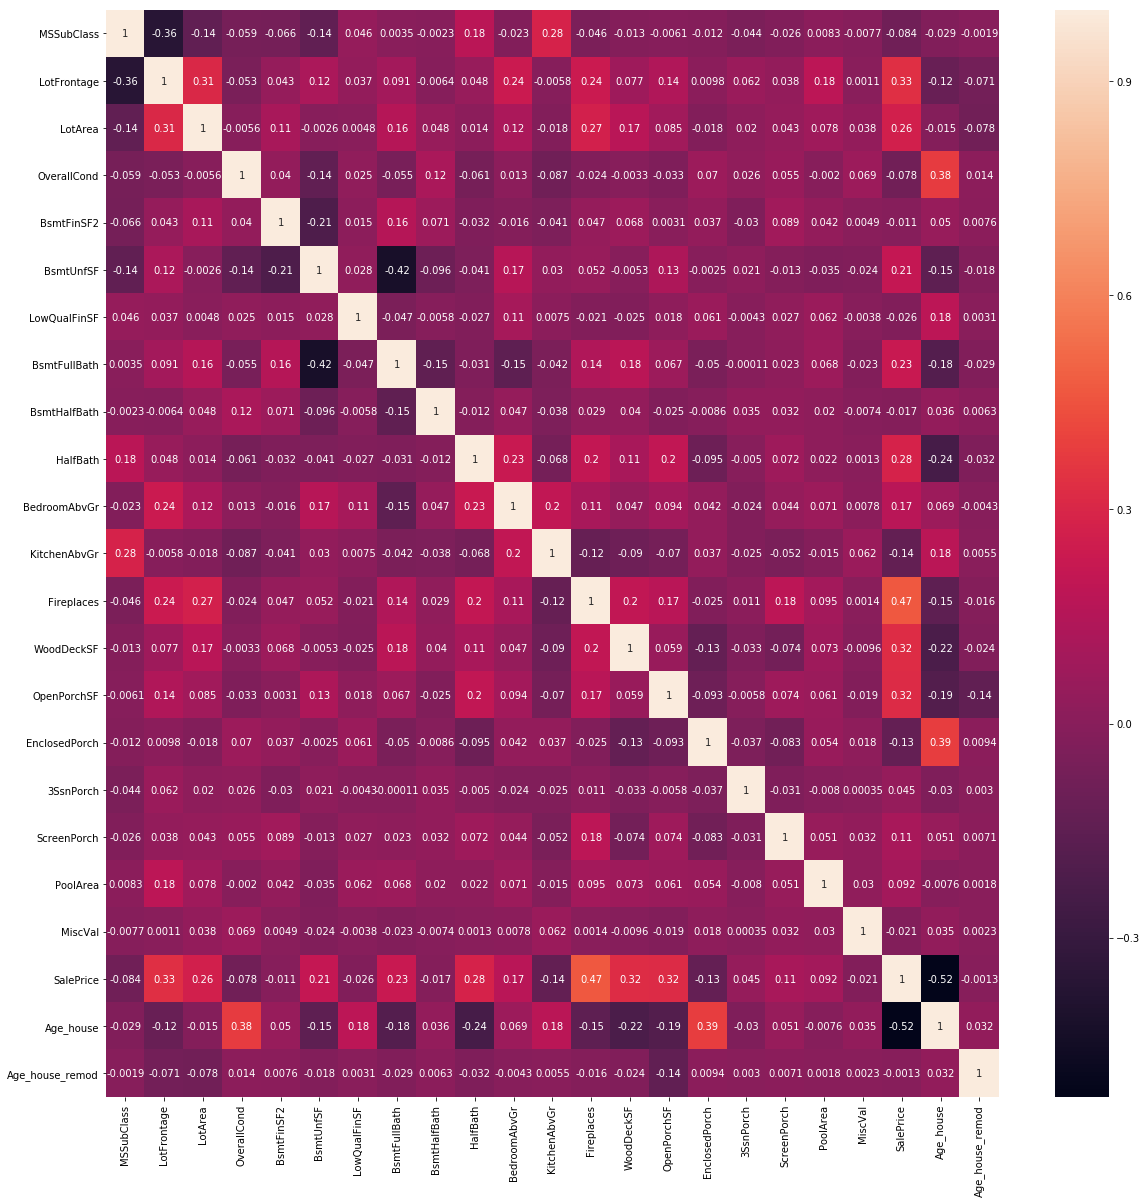

In [122]:
#Heat Map for Correlation 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(housing.corr(),annot = True)

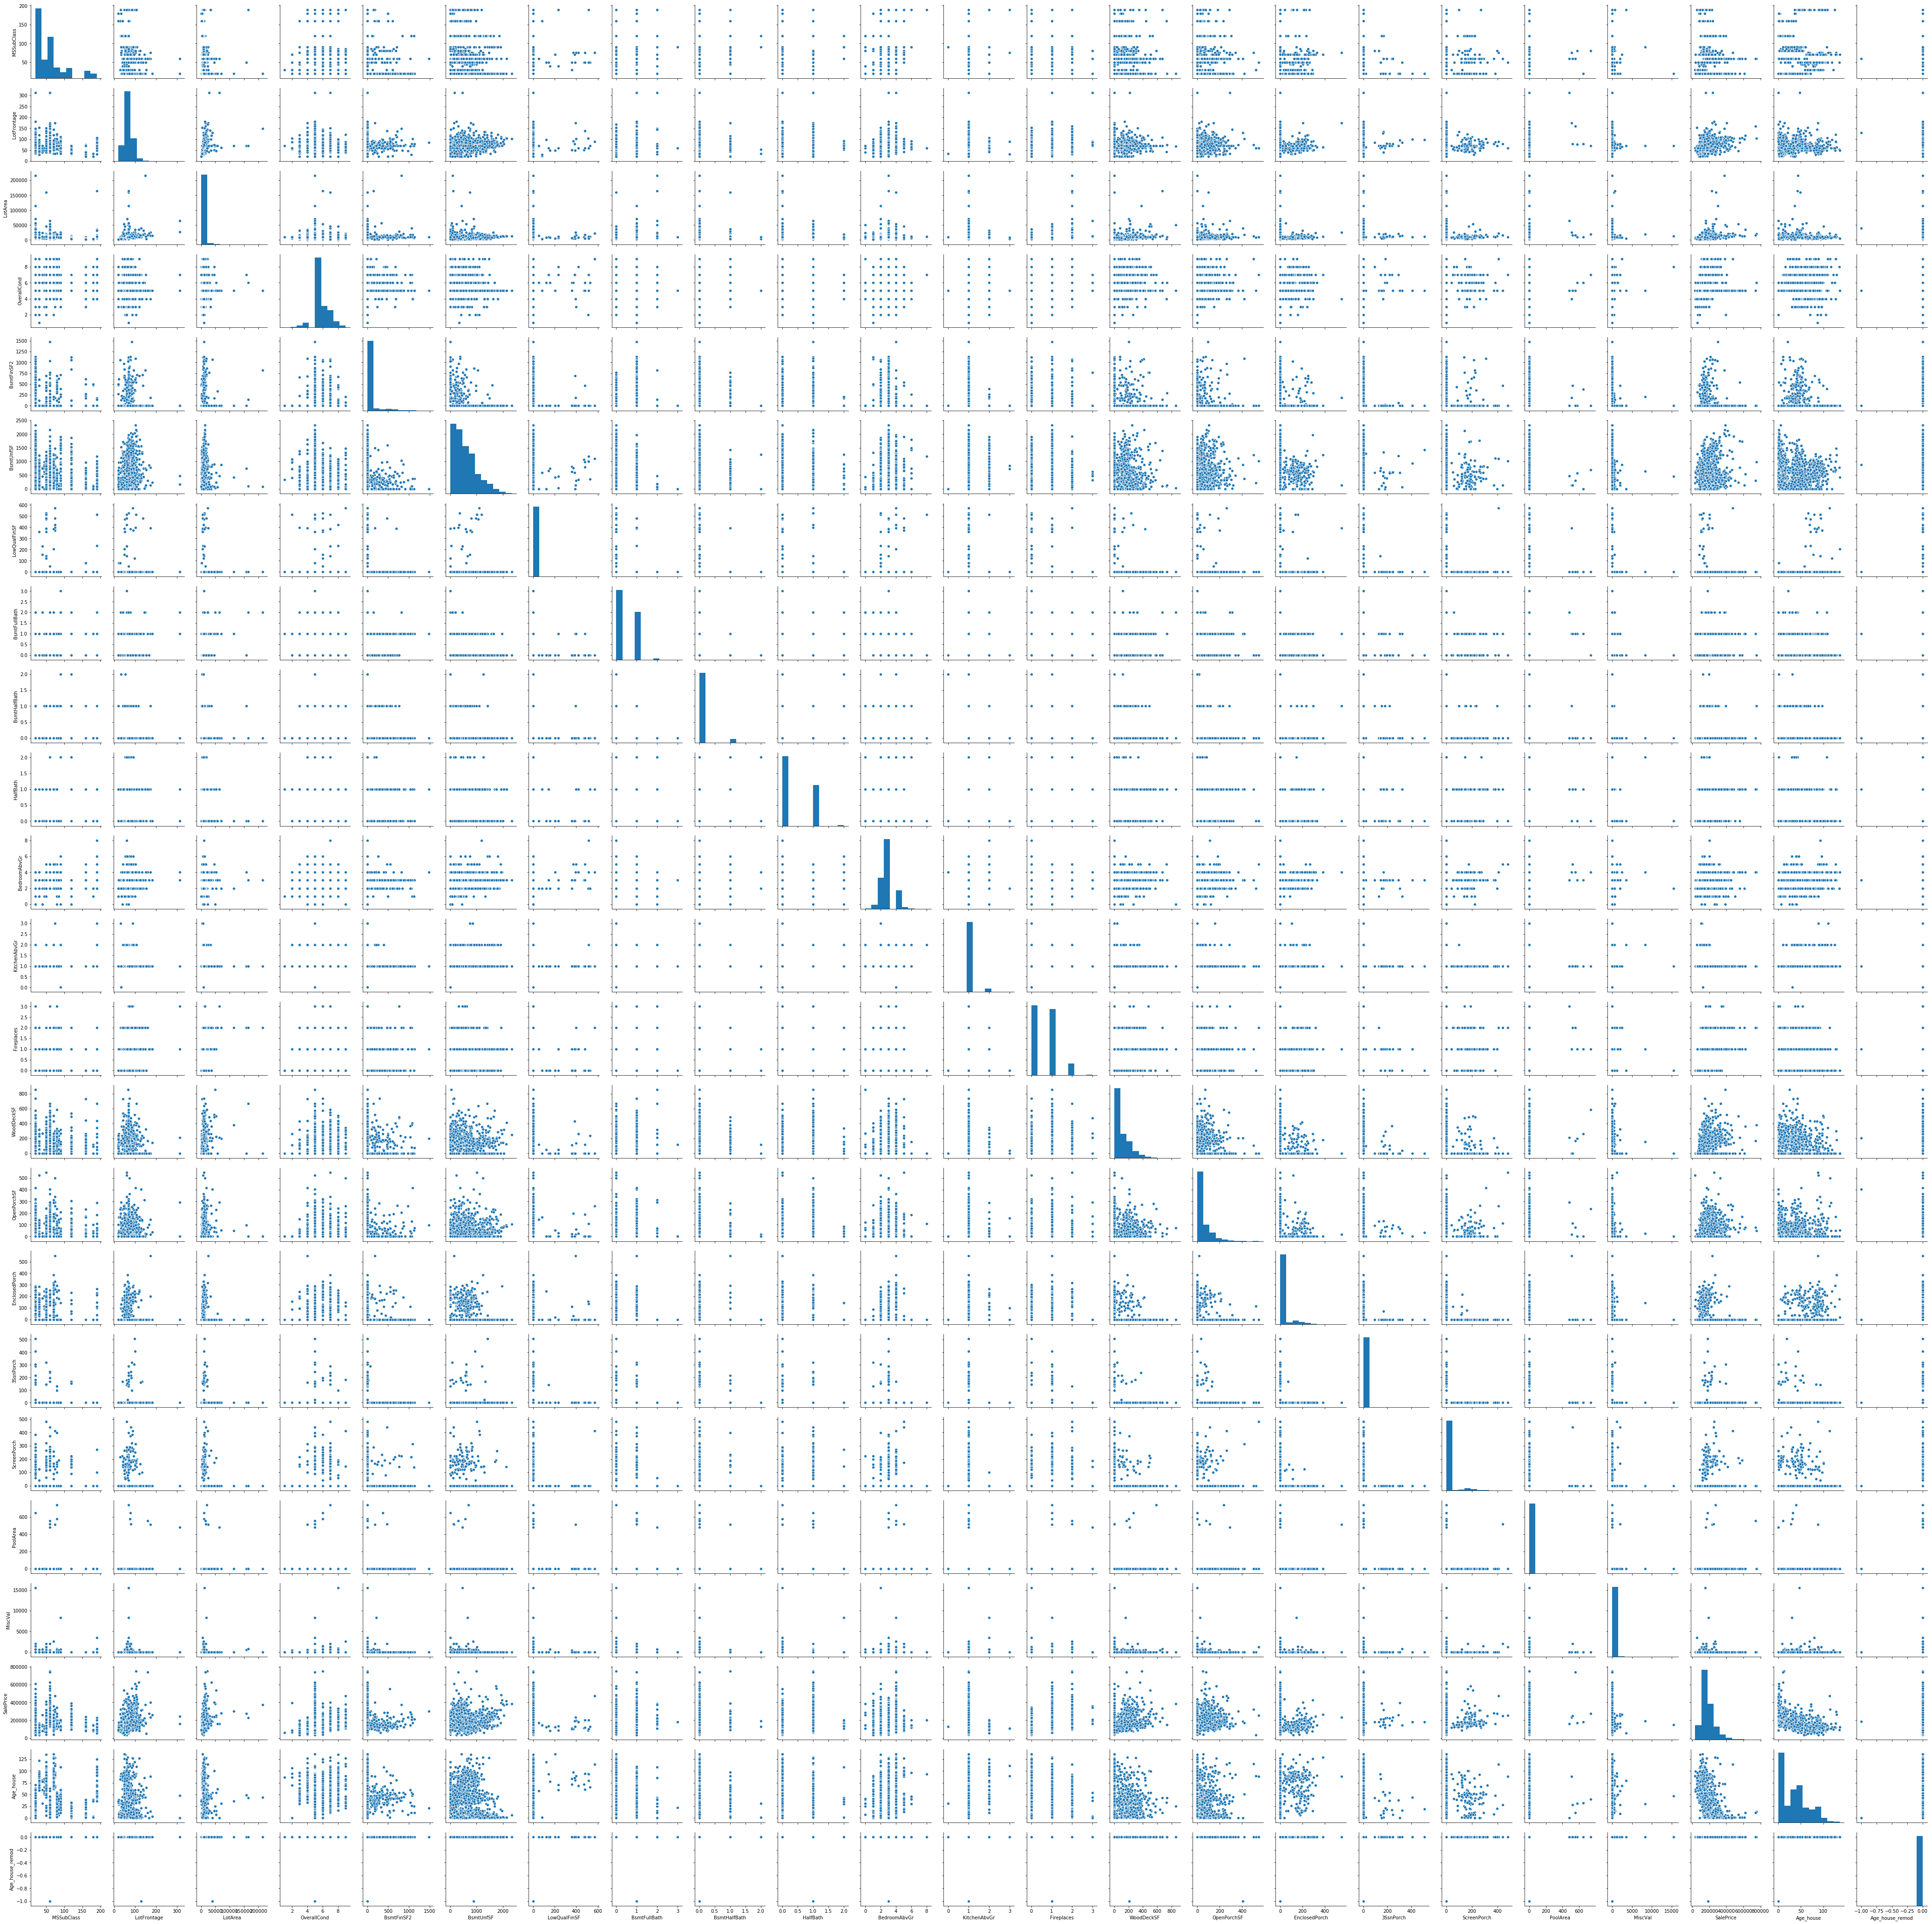

In [123]:
housing_numer=housing.select_dtypes(include=['int64','float64'])
sns.pairplot(housing_numer)

The correlation looks better than before we can continue ahead 

## Adding Dummy Variables

In [124]:
y = housing['SalePrice']
x=housing.drop('SalePrice',axis=1)
housing_cat = x.select_dtypes(include=['object'])
housing_cat.head()
# convert into dummies
hous_dummies = pd.get_dummies(housing_cat, drop_first=True)
hous_dummies.head()
# drop categorical variables 
x = x.drop(list(housing_cat.columns), axis=1)
# concat dummy variables with X
x = pd.concat([x, hous_dummies], axis=1)
# scaling the features
from sklearn.preprocessing import scale
cols = x.columns
x = pd.DataFrame(scale(x))
x.columns = cols
x.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Remod_ind_Y'],
      dtype='object', length=325)

In [125]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size = 0.3, random_state=100)

## Lasso Begins 

In [126]:
lasso = Lasso()
#params = {'alpha': [0.0001,0.005,0.05,0.5,1,2,3,4,5,6,7,8,9,10,20,25,27,30,32,35,37,40,43,47,50,52,53,55,57,58,62,65,67,68,70
#                   ,72,74,76,77,79,80,83,84,90,92,94,95,97,99,100,105,110,115,118,120,123,125,127,130,132,135,137,138,145,
#                  150,152,153,155,157,160,162,163,165,167,169,170,172,173,175,178,179,180,182,185,187,189,190,192,195,197,199,200
#                   ,205,210,215,218,220,222,225,227,229,230,232,235,237,239,240,242,245,247,249,250,252,254,257,259,260,262,264,
#                   267,269,270,272,275,277,279,280,282,283,285,287,289,290,292,294,297,299,300,302,305,307,309,310,312,315,317,319,
#                   320,323,325,327,329,330,332,334,335,337,339,340,343,345,347,349,350,352,354,357,359,360,362,365,367,369,370,372,
#                   375,377,379,380,382,385,387,389,390,392,395,397,399,400,402,405,407,409,410,412,415,417,419,420,425,427,429,430,432,
#                  435,440,445,450,465,470,475,480,482,485,487,490,500]}
params = {'alpha': [0.05,0.5,1,5,10,15,20,30,50,70,90,100,120,150,170,200,300,400,500,600,700,800,900,1000]}
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   18.2s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.341600,0.066390,0.001203,0.000680,0.05,{'alpha': 0.05},0.444451,0.624549,0.662108,0.488214,0.683436,0.580418,0.096195,24,0.921908,0.909149,0.912833,0.913162,0.913675,0.914145,0.004198
1,0.289263,0.042529,0.000601,0.000200,0.5,{'alpha': 0.5},0.445936,0.628524,0.663578,0.490306,0.686303,0.582795,0.096604,23,0.921897,0.909138,0.912826,0.913154,0.913673,0.914137,0.004198
2,0.298286,0.039898,0.000702,0.000246,1,{'alpha': 1},0.447318,0.632571,0.665149,0.491250,0.686953,0.584514,0.096822,22,0.921883,0.909124,0.912817,0.913143,0.913670,0.914127,0.004197
3,0.269912,0.029976,0.000702,0.000245,5,{'alpha': 5},0.454101,0.645868,0.672258,0.499176,0.691703,0.592486,0.096915,21,0.921778,0.909002,0.912733,0.913017,0.913627,0.914032,0.004200
4,0.293975,0.092184,0.000903,0.000585,10,{'alpha': 10},0.460917,0.647114,0.675774,0.509363,0.697490,0.597997,0.094927,20,0.921678,0.908834,0.912615,0.912798,0.913515,0.913888,0.004223


In [127]:
cv_results.loc[:,['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.05,0.914145,0.580418
1,0.5,0.914137,0.582795
2,1,0.914127,0.584514
3,5,0.914032,0.592486
4,10,0.913888,0.597997
5,15,0.913737,0.603289
6,20,0.913564,0.608290
7,30,0.913186,0.616876
8,50,0.912406,0.631049
9,70,0.911663,0.643264


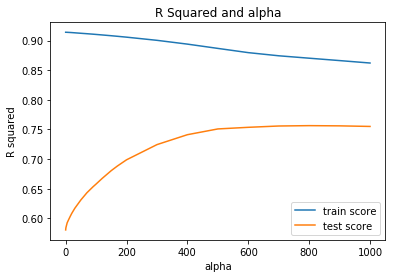

In [129]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R squared')

plt.title("R Squared and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [163]:
from sklearn import metrics
alpha =450
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = x.columns
cols = cols.insert(0, "constant")
Coeff=pd.DataFrame(list(zip(cols, model_parameters)))
Coeff.columns=['columns','coefficients']
Coeff.sort_values(by='coefficients',ascending=False)


,columns,coefficients
0,constant,180652.859
102,RoofMatl_WdShngl,12944.258
55,Neighborhood_NoRidge,12844.529
96,RoofMatl_CompShg,12477.491
13,Fireplaces,8897.442
56,Neighborhood_NridgHt,8869.257
6,BsmtUnfSF,8741.788
11,BedroomAbvGr,8197.097
155,BsmtExposure_Gd,7955.363
101,RoofMatl_WdShake,7352.163


In [131]:
# prediction
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
X_test= sm.add_constant(X_test)
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))



0.8763842576752034
0.8235033119377457


Text(0,0.5,'y_pred')

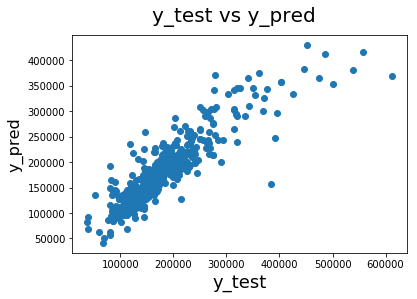

In [40]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1371267723.0552504
r_square_value : 0.7869185820720948


## Ridge Begins 

In [191]:
# list of alphas to tune

#Using the non-zero  coefficients from lasso to have ridge regression 

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.05, 0.5, 1, 5, 10, 15, 20, 30, 50, 70, 90, 100, 120, 150, 170, 200, 300, 400, 500, 600, 700, 800, 900, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [192]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.loc[:,['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.05,0.914163,0.583199
1,0.5,0.914037,0.597209
2,1,0.913832,0.607910
3,5,0.911480,0.652724
4,10,0.908461,0.675547
5,15,0.905888,0.687120
6,20,0.903701,0.694240
7,30,0.900106,0.702874
8,50,0.894622,0.712010
9,70,0.890273,0.717286


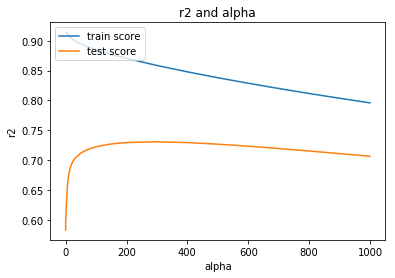

In [193]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [195]:
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.51134640e+03,  3.19913152e+03,  6.01234120e+03,  4.20259086e+03,
        1.58069118e+03,  6.65340632e+03, -3.54162791e+02,  4.51158802e+03,
        4.83881725e+02,  3.50912526e+03,  6.35924429e+03,  6.36713737e+02,
        8.37962362e+03,  3.36003256e+03,  2.98766915e+03, -2.56451399e+02,
        1.61311193e+03,  2.06621963e+03,  1.79188014e+03, -3.68969879e+02,
       -3.70207028e+03,  1.94837270e+03,  7.76120335e+02,  3.17122345e+02,
        1.61994469e+03, -6.32085069e+01,  1.40219732e+03,  3.14984305e+02,
       -2.39306355e+03,  1.58628416e+02,  1.10859158e+03,  5.53417135e+02,
        2.11066943e+03, -9.75127124e+02,  3.75042867e+03, -2.11703372e+03,
       -8.77339497e+02, -3.61296045e+02,  7.27750256e+02, -1.28135458e+03,
        4.64883304e+00, -2.82066668e+02, -1.52647245e+03, -5.67601268e+02,
       -2.49465947e+03,  4.48986914e+03, -3.87825052e+03, -3.68770906e+03,
       -1.92690717e+03, -2.95714718e+03, -2.58532914e+03, -3.38367651e+03,
        1.07141080e+03,  

In [196]:
# prediction
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
X_test= sm.add_constant(X_test)
y_test_pred_r = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_r))


0.8634082491717091
0.8131464469889165


Text(0,0.5,'y_pred')

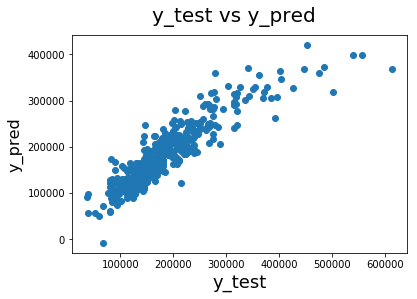

In [197]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_r)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

Attributes like Roof Material ,Neighborhood,Lot Area,OverallCond,Remod_ind_Y,Age_house seems  to have high importance from the model created . 
and the hyperparameter suitable for lasso is 450 and for ridge is 250 